# Ballistic sedimentation tests

Notes from DA Kring 06/01/21

The ballistic speed of ejected material traveling over distances that are small relative to the radius of a body can be estimated assuming a planar surface.  The ballistic speed (υ) is then

$υ = \sqrt{\frac{d g}{sin2\theta}}$

where d is the ballistic range, g is gravity (1.624 m/s2 for the Moon), θ is the ejection angle (typically 45°, used here).  The ballistic speed of ejected material traveling 28 to 40 km is 770 to 920 km/hr (0.21 to 0.25 km/s).  Such speeds are too low to produce an explosion or hypervelocity impact crater; typically 3 km/s is needed for the kinetic energy of impact to exceed the internal energy of the impactor, causing an explosive release of energy.  The material might, instead, fragment upon landing and produce a distributed series of rocks.  It might also mechanically excavate a crater, which is not observed.

When the distance is larger, a planar surface approximation is no longer appropriate.  To derive a ballistic formula for a spherical body, we begin with the half-angular distance of travel, φ = R/2Rp, which is related to velocity and the ejection angle (θ) by (Vickery, 1986)

$tan \phi = \frac{v^2 sin \theta cos \theta}{g R_p - v^2 cos^2 \theta}$

where g is again gravity and Rp the Moon’s radius, assuming it is a perfect sphere.  That can be rewritten as

$v = \sqrt{\frac{gR_p tan \phi}{sin \theta cos \theta + cos^2 \theta tan \phi}}$

We utilize an ejection angle of 45°, which is the most probable angle, and noting that the velocity is relatively insensitive to variations of 45 ± 15° (Vickery, 1986).  For Rp = 1737 km, the ballistic speed of debris traveling 400 to 435 km would be 0.76 to 0.79 km/s (2750 to 2860 km/hr).  Those are not hypervelocity speeds, but there would be sufficient kinetic energy to mechanically excavate craters upon landing.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
G_MOON = 1.624  # [m s^-2]
R_MOON = 1737 * 1e3  # [m]

# Functions
def ballistic_planar(theta, d, g=G_MOON):
    """
    Return ballistic speed (v) given ballistic range (d) and gravity of planet (g).
    
    Assumes planar surface (d << R_planet)
    """
    return np.sqrt((d * g) / np.sin(2 * theta))


def ballistic_spherical(theta, d, g=G_MOON, rp=R_MOON):
    """
    Return ballistic speed (v) given distance of travel (d) and gravity and radius of planet (g, Rp).
    
    Assumes perfectly spherical planet (Vickery, 1986).
    """
    tan_phi = np.tan(d / (2 * rp))
    return np.sqrt(
        (g * rp * tan_phi) / 
        ((np.sin(theta) * np.cos(theta)) + (np.cos(theta)**2 * tan_phi))
    )

def mps2kmph(v):
    """Return v in km/hr, given v in m/s"""
    return 3600 * v / 1000

Planar examples:
Ballistic speed at distance 28 km: 768 km/h
Ballistic speed at distance 40 km: 918 km/h

Spherical examples:
Ballistic speed at distance 400 km: 2753 km/h
Ballistic speed at distance 435 km: 2859 km/h


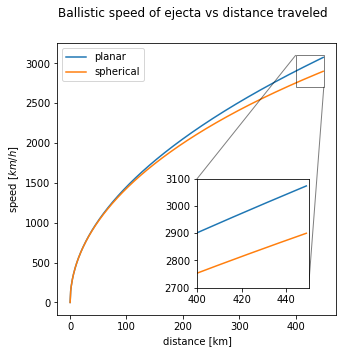

In [2]:
theta = np.deg2rad(45)
d = np.arange(450) * 1000  # [m]
v_planar = mps2kmph(ballistic_planar(theta, d))
v_spherical = mps2kmph(ballistic_spherical(theta, d))

f, ax = plt.subplots(figsize=(5, 5))
f.suptitle('Ballistic speed of ejecta vs distance traveled')

d_km = d / 1000
ax.plot(d_km, v_planar, label='planar')
ax.plot(d_km, v_spherical, label='spherical')

# inset
axins = ax.inset_axes([0.5, 0.1, 0.4, 0.4])
axins.plot(d_km, v_planar, label='planar')
axins.plot(d_km, v_spherical, label='spherical')
x1, x2, y1, y2 = (400, 450, 2700, 3100)
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
ax.indicate_inset_zoom(axins, edgecolor="black")
ax.legend()

ax.set_xlabel('distance [km]')
ax.set_ylabel('speed [$km/h$]')

# Check values given to us
print('Planar examples:')
for i in (28, 40):
    print(f'Ballistic speed at distance {d_km[i]:.0f} km: {v_planar[i]:.0f} km/h')


print('\nSpherical examples:')
for i in (400, 435):
    print(f'Ballistic speed at distance {d_km[i]:.0f} km: {v_spherical[i]:.0f} km/h')

